In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
#import keras
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

print(tf.__version__)

2.7.0


# Prepare data

In [ ]:
dataset_path = "D:\MA_study\Detectron\data_sets_ready\classification\im_train_aug"
#data_dir = tf.keras.utils.get_file(origin=dataset_path, 
                                   #fname='im_train', 
                                  #untar=True)
testset_path = r"D:\MA_study\Detectron\data_sets_ready\classification\test2"        
data_dir = pathlib.Path(dataset_path)
test_dir = pathlib.Path(testset_path)

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

0


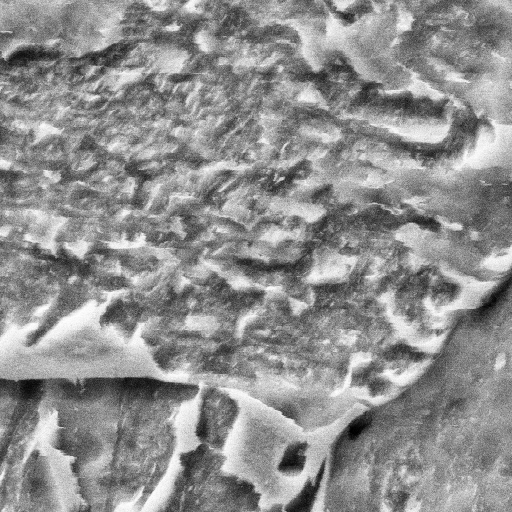

In [ ]:
#visualize an example image

class_i = list(data_dir.glob('i/*'))
PIL.Image.open(str(class_i[10]))

In [ ]:
#define parameter for loader

batch_size = 16
img_height = 200
img_width = 200

In [ ]:
#define train/val split

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 975 files belonging to 3 classes.
Using 780 files for training.


In [ ]:
#define train/val split
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 975 files belonging to 3 classes.
Using 195 files for validation.


In [ ]:
#define train/val split
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  subset=None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 416 files belonging to 3 classes.


In [ ]:
#find class names

class_names = train_ds.class_names
print(class_names)


['i', 'ii', 'iii']


In [ ]:
#visualize first 9 images with class

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

In [ ]:
#prefetching and caching for efficient memory usage

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Train and test model

1) Train without augmentation <br>
(for augmentation, continue with "2) Train with augmentation")

In [ ]:
num_classes = 3

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
model.summary()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

2) Train with augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
num_classes = 3

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 200, 200, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                  

In [ ]:
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/20
26/26 [==============================] - 4s 128ms/step - loss: 0.1405 - accuracy: 0.9474 - val_loss: 0.5484 - val_accuracy: 0.8513
Epoch 2/20
26/26 [==============================] - 4s 122ms/step - loss: 0.2054 - accuracy: 0.9154 - val_loss: 1.2250 - val_accuracy: 0.7538
Epoch 3/20
26/26 [==============================] - 4s 130ms/step - loss: 0.1838 - accuracy: 0.9308 - val_loss: 0.3248 - val_accuracy: 0.8667
Epoch 4/20
26/26 [==============================] - 4s 121ms/step - loss: 0.1903 - accuracy: 0.9231 - val_loss: 0.3156 - val_accuracy: 0.8769
Epoch 5/20
26/26 [==============================] - 4s 124ms/step - loss: 0.1980 - accuracy: 0.9244 - val_loss: 0.5302 - val_accuracy: 0.8205
Epoch 6/20
26/26 [==============================] - 4s 124ms/step - loss: 0.1915 - accuracy: 0.9333 - val_loss: 0.2680 - val_accuracy: 0.8872
Epoch 7/20
26/26 [==============================] - 4s 119ms/step - loss: 0.1419 - accuracy: 0.9462 - val_loss: 0.4060 - val_accuracy: 0.8564
Epoch 

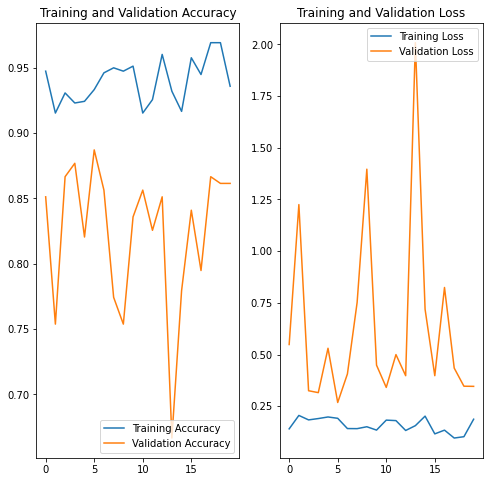

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Model testing

In [ ]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [ ]:
predictions = model.predict(x=test_ds, verbose=0)

In [ ]:
train_ds

<BatchDataset shapes: ((None, 200, 200, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)

In [ ]:
cm = confusion_matrix(y_true=true_categories, y_pred=np.argmax(predictions, axis=1))

In [ ]:
cm_plot_labels = ['A','B','C']

In [ ]:
print(cm)

[[114  55  39]
 [ 57  37  18]
 [ 59  29   8]]


# Test trained model on new data

In [ ]:
test_image_path = r"D:\MA_study\Training\210823_dataSet_update\CFB10\10_500\PlainImages-25-02\10_500-V-12mm-4000x15.tif"

In [ ]:
img = keras.preprocessing.image.load_img(
    test_image_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)